In [1]:
from _tools import *
import matplotlib.pyplot as plt
import xarray as xr

{'filename': 'D:\\Jetbrains\\Python\\Projects\\02807_Project\\data\\time_series\\16000649.nc',
 'start_date': datetime.datetime(2018, 10, 1, 0, 0),
 'end_date': datetime.datetime(2019, 12, 31, 0, 0)}

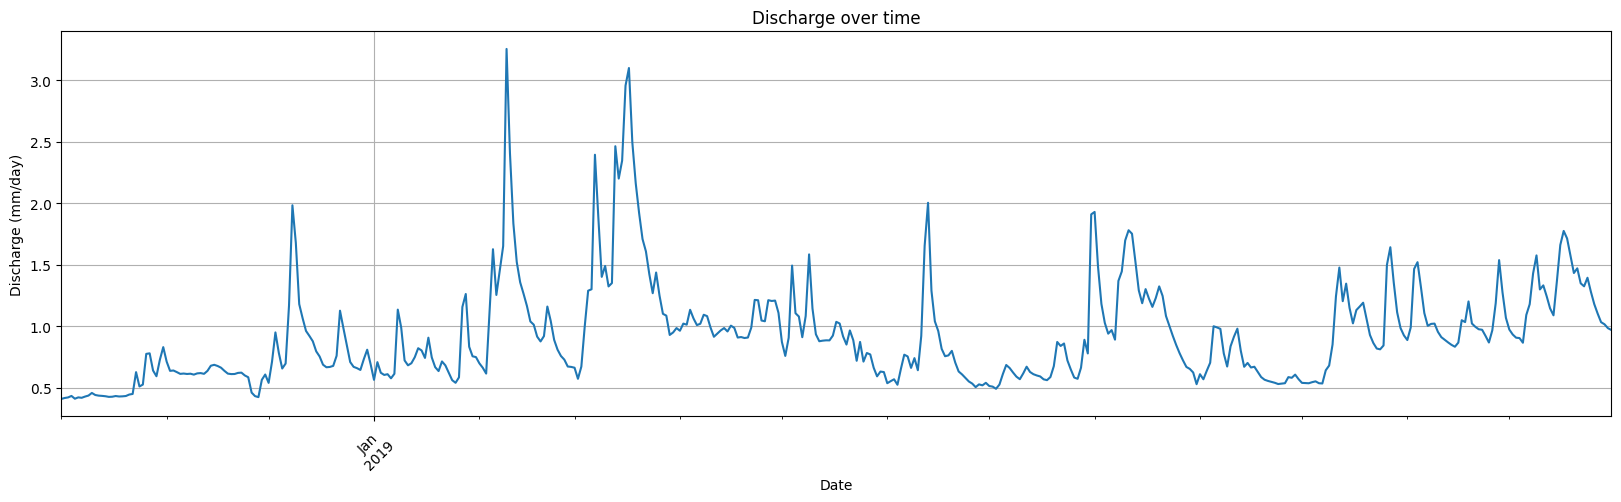

In [20]:
file = r'D:\Jetbrains\Python\Projects\02807_Project\data\time_series\16000649.nc'

# Open the netCDF file
dataset = xr.open_dataset(file, decode_times=False)
start_date, end_date = get_start_and_end_date_from_netcdf(dataset)

display({
    'filename': file,
    'start_date': start_date,
    'end_date': end_date
})

df = netcdf_to_dataframe(file)
df['date'] = pd.date_range(start_date, start_date + timedelta(days=len(df) - 1))
df.index = df['date']
df.drop('date', axis=1, inplace=True)
# Drop NaN values in Q[mmday] column
# df.dropna(subset=['Q[mmday]'], inplace=True)
# df
df['Q[mmday]'].plot(figsize=(20, 5), title="Discharge over time", xlabel="Date", ylabel="Discharge (mm/day)")
# add ticks every year
plt.xticks(pd.date_range(start=start_date, end=end_date, freq='YS'), rotation=45)
plt.grid()

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 457 entries, 2018-10-01 to 2019-12-31
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   T[degC]       457 non-null    float32
 1   P[mmday]      457 non-null    float32
 2   PET[mmday]    457 non-null    float32
 3   Q[mmday]      457 non-null    float32
 4   Q_sim[mmday]  457 non-null    float32
dtypes: float32(5)
memory usage: 12.5 KB


In [6]:
df.loc['2016']['Q[mmday]'].plot(figsize=(15, 5), title="Discharge over time in 2009")

KeyError: '2016'

In [27]:
import pandas as pd
complete_years = pd.read_csv('output/data/discharge_tables/complete_years.csv', sep = ',', index_col = 0)
complete_years.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22 entries, 2001 to 2022
Columns: 382 entries, 0 to 381
dtypes: float64(137), int64(245)
memory usage: 65.8 KB
